In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [10]:
task = 'deconv' #[compsens, deconv, inpaint]

result_file = f'/home/blevac/Diffusion_Inverse/results/{task}_results_likelihood/checkpoint.pt'
cont = torch.load(result_file)
print(cont.keys())
gt_img = cont['gt_img']
recon = cont['recon']
meas = cont['meas']
utils = cont['forward_utils']
print('NRMSE: ', cont['nrmse'])

dict_keys(['gt_img', 'recon', 'meas', 'forward_utils', 'nrmse'])
NRMSE:  0.9998108744621277


In [11]:
if task == 'compsens':
    A_pinv = torch.linalg.pinv(utils.A)
    pinv_recon = torch.matmul(meas,A_pinv)
    pinv_recon = pinv_recon.reshape(1,3,gt_img.shape[-2],gt_img.shape[-1])
    # adj_img = utils.adjoint(meas)
elif task == 'inpaint':
    adj_img = utils.adjoint(meas)
elif task == 'deconv':
    psf = utils.psf

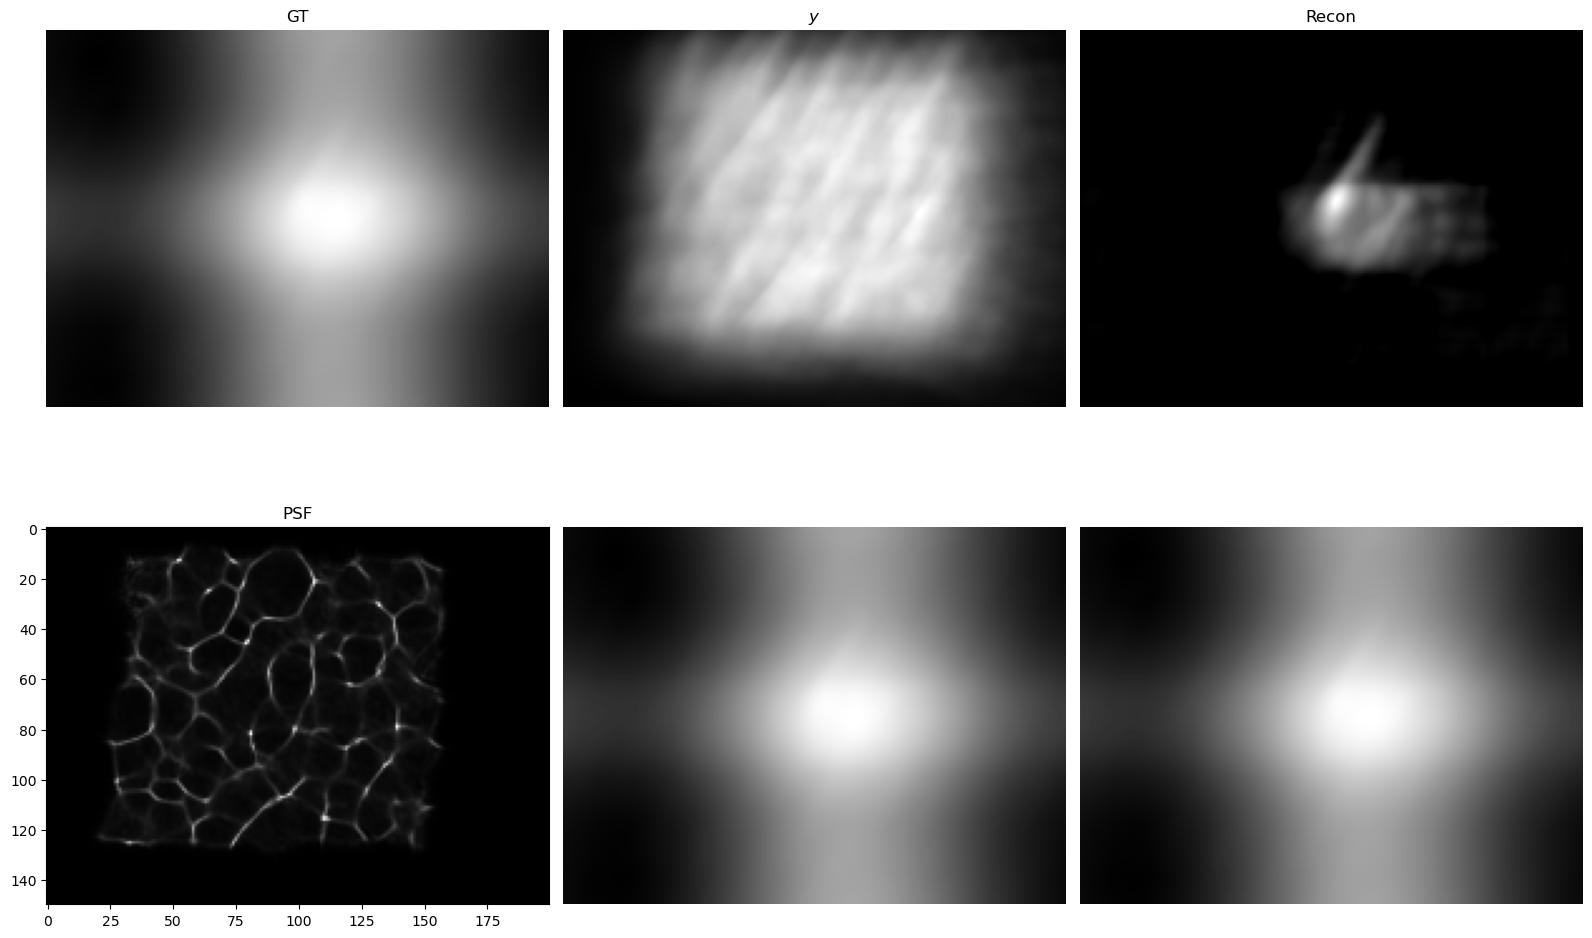

In [14]:
if task == 'deconv':
    
    plt.figure(figsize=(16,11))
    plt.subplot(2,3,1)
    plt.title('GT')
    plt.imshow((gt_img[0].permute(-2,-1,0).cpu().real + 1) /2,cmap='gray')
    plt.axis('off')
    plt.subplot(2,3,4)
    plt.title('PSF')
    plt.imshow(psf[0,0].cpu(),cmap='gray')
    # plt.axis('off')

    plt.subplot(2,3,2)
    plt.title('$y$')
    plt.imshow((meas[0].permute(-2,-1,0).cpu().real + 1) /2,cmap='gray')
    plt.axis('off')
    plt.subplot(2,3,5)
    plt.imshow(((gt_img-meas)[0].permute(-2,-1,0).cpu().real + 1) /2,cmap='gray')
    plt.axis('off')

    plt.subplot(2,3,3)
    plt.title('Recon')
    plt.imshow((recon[0].permute(-2,-1,0).cpu().real + 1) /2,cmap='gray')
    plt.axis('off')
    plt.subplot(2,3,6)
    plt.imshow(((gt_img[0]-recon[0]).permute(-2,-1,0).cpu().real + 1) /2,cmap='gray')
    plt.axis('off')

    plt.tight_layout(pad=1.0)

